<div style='width:500px; height:220px; border-bottom:10px black solid;border-left: 10px green solid;padding: 10px 10px 10px 10px;'>
    <h1> ---Portofolio Optimization Plot---</h1>
    <h3> Author: Jakob Lindstrøm </h3>
    <h3> Date: 03.05.2023 </h3>
</div>

<div style='width:600px; height:850px; padding: 10px 10px 10px 10px;border-bottom:10px black solid;
            border-left: 10px green solid'>
    <div>
        <h4>Keywords:</h4>
        <p> Stocks, portfolio, optimization, finance </p>
        <br>
        <p>License: CC-BY-NC</p>
        <h4> Data sources:  </h4>
        <p> yfinance: https://pypi.org/project/yfinance/ </p>
        <p> DNB markets: https://www.dnb.no/bedrift/markets/analyser/arkiv/anbefalteaksjer.html </p>
        <h4> Intention: </h4>
        <p> This programe has the final goal of forecasting a markovitz optimized portofolio. First a couple of stocks will be retrieved thorugh the yahoo finance library. Then the optimal portofolio will be generated using Markovitz portofolio theory. The past movement of this portofolio will be the subject of machine learning modelling. A multi-model machine learning algorithm will be used to fit a the model, and the model will then apply a recursive forecasting strategy to forecast future movements of the plot.  I use weekly recommened stock data from DNB markets. </p>
        <h4> Disclaimer: </h4>
        <p> The author do not take any responsibility for potential consequences thats been a result of using the code below. </p>
    </div>
</div>

<h1> Table of content </h1>
<ol>
<li>Importing libraries</li>
<li>State input and retrieval</li>
<li>Feature engineering</li>
<li>Random portofolios</li>
<li>Optimization on Sharpe and Sortino</li>
<li>Plot over different portofolios</li>
<li>Machine Learning on time series</li>
<ol>
<li>Trend, MLR</li>
<li>Cycles, RFR_CV</li>
<li>Residuals, RFR_CV</li>

</ol>
<li>Forecasting</li>
<li>Summary</li>

</ol>

<em> Possible improvements:
<ol>
<li> Use logaritmic stock returns</li>
<li> Generate a random walk, with a modified distributions in accordance to each stock distributions</li>
<li> Investigate different ML-models for modelling cycles and residuals, maybe LSTM.</li>
<li> Make the time series component analysis more automized.</li>
<li> Come up with new ideas, for example include a modified random walk adjusted to a Cholensky matrix. </li>
<li> Create a dashboard either using bokeh or an application using tkinter </li>
<li> ...</li>

</ol></em>

<h1> Import code

In [1]:
from PyFiles.portofolioCloud import PortofolioCloud
from PyFiles.optimizer import Optimized
from PyFiles.forecaster import Forecaster

c:\Users\Jakob\anaconda3_old\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1> Generate portfolio cloud </h1>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


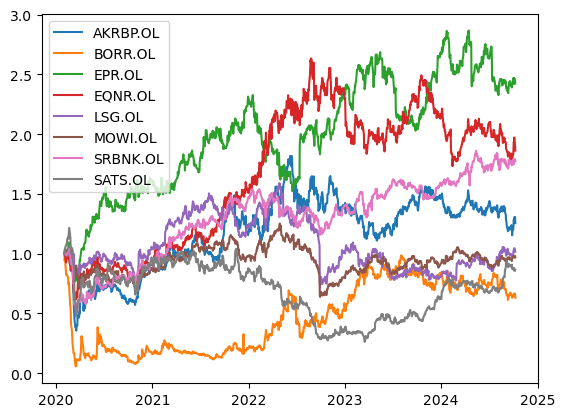

In [14]:
stocks = ['AKRBP.OL','BORR.OL','EPR.OL','EQNR.OL','LSG.OL','MOWI.OL','SRBNK.OL','SATS.OL']
#format: year-month-day
startPor = '2020-02-01'
hold_portofolio_days = 21
portofolio_Distributions = 5000
alfa = PortofolioCloud(stocks,500,startPor)
alfa.final_df()
alfa.plot_stocks()

<h1> Optimize portfolios </h1>

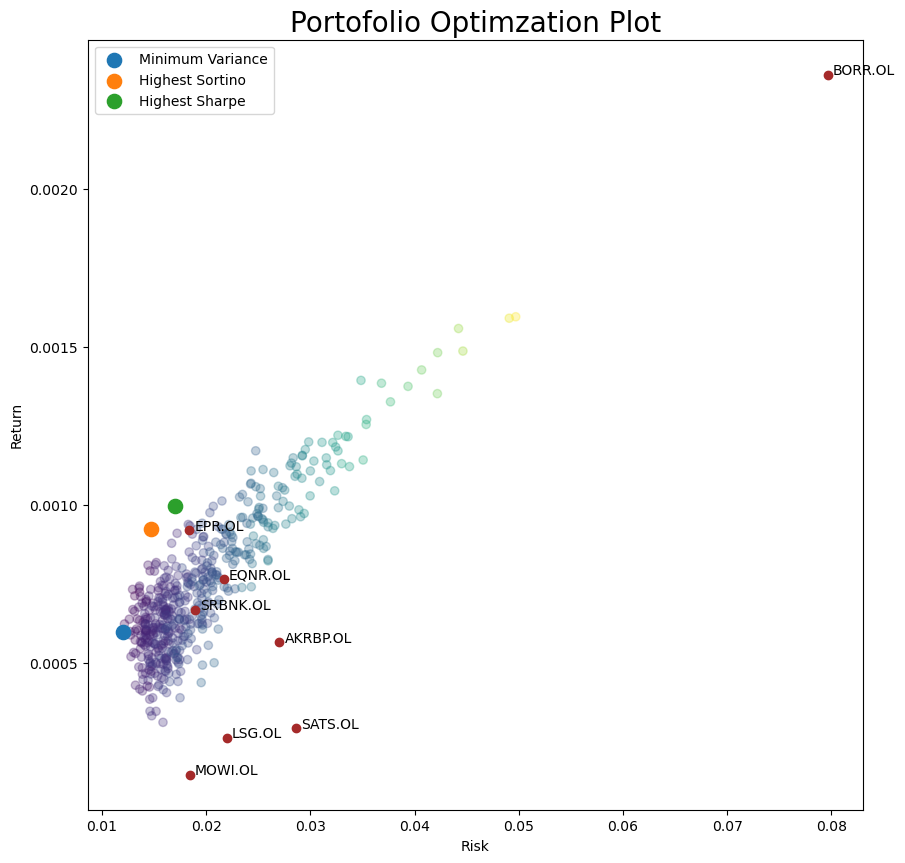

In [15]:
bravo = Optimized(alfa.stocks, alfa.df,
                  alfa.tot_cov_mat,alfa.neg_cov_mat,
                  alfa.returns, alfa.mean, alfa.std)
bravo.PortofolioOptimizer()
bravo.plot_optimization()

<h1> Forecast using ML </h1>

In [17]:
# 0 = MinVar | 1 = Sortino | 2 = Sharpe

mychoice = 1

charlie = Forecaster(stocks=alfa.stocks_matrix,
                     optimized_portofolios=bravo.optimized_portofolios,
                     choosen_portofolio=mychoice,
                     forecast_period=20)
charlie.show_distribution()

Highest Sortino
Stock distributions:
   AKRBP.OL  BORR.OL  EPR.OL  EQNR.OL  LSG.OL  MOWI.OL  SRBNK.OL  SATS.OL
0       0.0     0.05    0.57     0.22     0.0      0.0      0.16      0.0


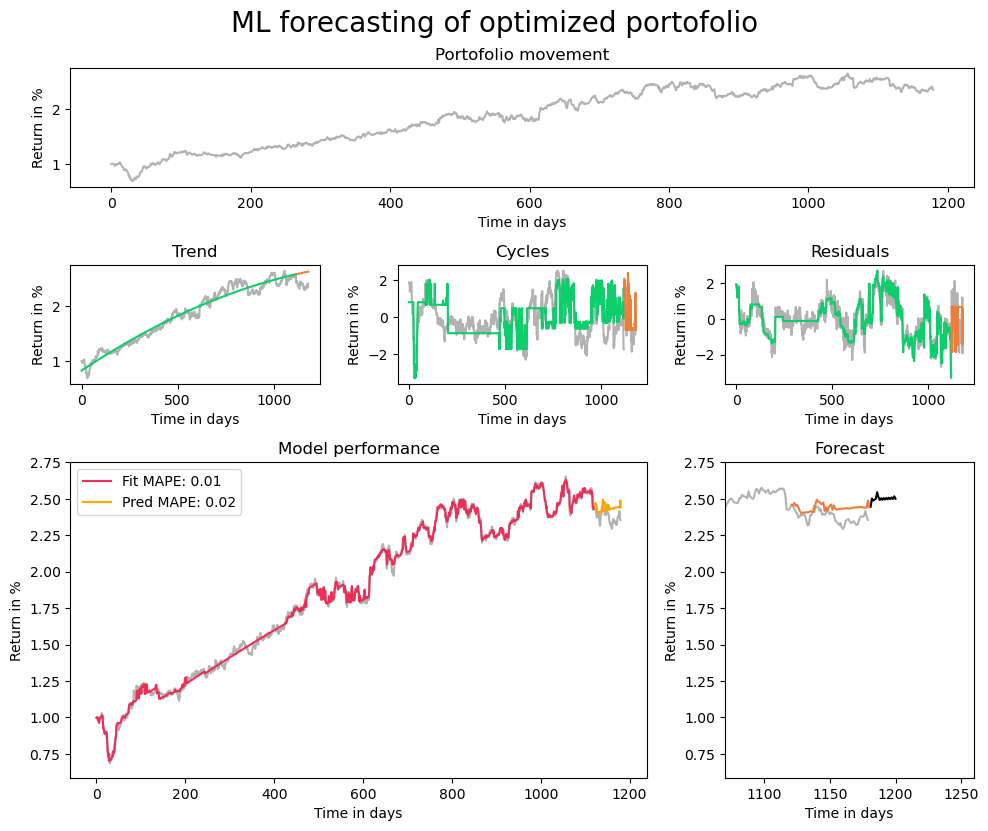

In [7]:
charlie.forecast()

<h1> 9 Summary </h1>
<p> 
    To start I will mention that this programme is under development and has a lot of planned improvments.
</p>
<br>
<p> 
Now I will comment my findings on the timeseries multiplot. It seems like the model has a good ability to capture trends, cycles and residuals. The fitted and predicted line do not follow the timeseries very accurately, this might indicate that the algorithm is underfitting...
</p>
<ol> 
    <li> 
        The trend  prediction seems to capture the actual trend quite good. Do the nature of the timeseries its plausible to believe that the trend is exponential, and then quadratic.
    </li>
    <li> 
        The model seems to capture the cycles quite well. However, the fitted and predicted line has several points where its quite stable and therefore it may indicate that the model is underfitting. 
    </li>
    <li> 
        The model on residuals seems to encounter the same situation as the previous model.
    </li>
</ol>
<p> 
    An inital thought about the time series model is that the model has potential of capturing both the cycles and residuals better. One possible  way of countering this problem is to do some better finetuning og using different models. 
</p>
<em><h3> This programme is in a development phase </h3> </em>

